# Census Income Project
## Problem Statement:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). ***The prediction task is to determine whether a person makes over $50K a year.***

## Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.

Columns:
1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv
![](https://miro.medium.com/max/2400/1*IH10jlQEJ7GW1_oq8s7WPw.png)

In [1]:
'''Importing Important libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


![](https://kiarofoods.com/wp-content/uploads/2019/10/line_break.png)

# Exploratory Data Analysis:
**Problem Type Identification:** We have the target variable available with us. So, it a supervised machine learning problem. First we try to find out the type of supervised machine learning that we have in this case study by lookin at the target variable

In [3]:
print(f"Target: 'Income'\nUnique Values in Income: {data.Income.unique()}\nNumber of unique values: {data.Income.nunique()}")

Target: 'Income'
Unique Values in Income: [' <=50K' ' >50K']
Number of unique values: 2


In the problem, we have 'Income' as the Target variable. we see that we have only two values which are to be predicted, either the income is greater than 50K, which is Yes, or the income is less than or equal to 50K, which is No. We will label encode the target variable.

In [4]:
data['Income'] = data['Income'].str.replace(' <=50K', '0')
data['Income'] = data['Income'].str.replace(' >50K', '1')

In [5]:
data['Income'] = data['Income'].astype(np.int64)

In [6]:
data.Income.dtypes

dtype('int64')

We can see that, we have encoded the values of the target variable, and converted it into int data-type. This problem is a classification problem with 'Income' as the target variable. Making a copy of the dataset to work ahead.

In [7]:
ds = data.copy()

In [8]:
print(f"Unique values in 'Education': {ds.Education.nunique()}\nUnique values in 'Education_num': {ds.Education_num.nunique()}")

Unique values in 'Education': 16
Unique values in 'Education_num': 16


We see that for the feature 'Education', we already have the encoded values in feature 'Education_num'. 'Education' will be removed from the dataset.

In [9]:
ds.drop(['Education'], axis = 1, inplace = True)

Checking to see that is there any Null values present in the data that we have. Handling the null values will be the first thing that we need to do. Then, we have a look at the data-types of the other features and the value counts and unique values in those features.

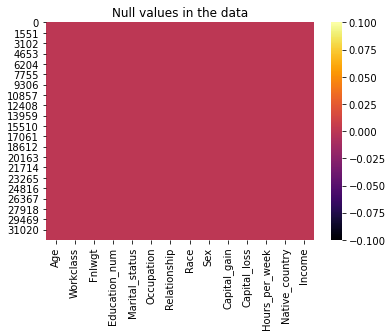

In [10]:
plt.title("Null values in the data", fontsize = 12)
sns.heatmap(ds.isnull(), cmap = 'inferno')
plt.show()

From the heatmap, we see that the dataset consists of no null values. But for some features, we have '?' as the values present. **'?' will be considered as null values.** We move ahead with the feature engineering part. Checking the datatypes of the columns

In [11]:
ds.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income             int64
dtype: object

In [12]:
ds.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

*'Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country' are the categorical variables in the data*. Proper encoding or conversion of these variables is necessary for the feature engineering. We will look at these attributes and convert them one by one.

**'Workclass':** Starting off with the work class, we look the number of unique values and value counts for those values

In [13]:
ds.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In work class, *majority of the people are private employees*. The *minority of people are either working without-pay or they have never-worked*. We can combine the values of these two values as one. first we remove the blank space from the column is present in any values.

In [14]:
ds['Workclass'] = ds['Workclass'].str.replace(' ', '')
ds['Workclass'] = ds['Workclass'].str.replace('Never-worked', 'Without-pay')

Now, we have 8 unique values in this feature. But, we see that **there are some values where we have '?' in the column. This values can be replaced with NaN values.**

In [15]:
ds['Workclass'] = ds['Workclass'].replace('?', np.NaN)

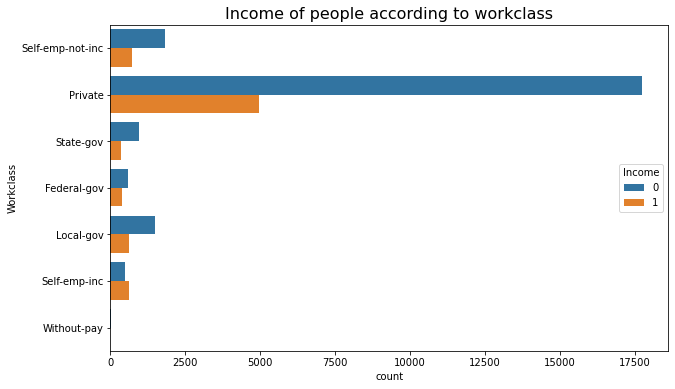

In [18]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to workclass", fontsize = 16)
sns.countplot(y = ds['Workclass'], hue = ds['Income'])
plt.show()

We see that the **majority of people who have income more than 50K a year are from private sector**. Same goes for the people with income less than 50K. But *for the Self Employed sector, the number of people whose income > 50K are more than the number of people whose income < 50K.* Now, moving ahead with replacing the null values and encoding the feature.

In [19]:
from scipy.stats import mode

In [20]:
workclass_mode = ds.pivot_table(values='Workclass', columns='Occupation',aggfunc=(lambda x:mode(x).mode[0]))
workclass_mode

Occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
Workclass,Without-pay,Private,Federal-gov,Private,Private,Private,Private,Private,Private,Private,Private,Local-gov,Private,Private,Private


In [21]:
loc1 = ds['Workclass'].isnull()
loc1

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Name: Workclass, Length: 32560, dtype: bool

In [22]:
ds.loc[loc1, 'Workclass']

26       NaN
60       NaN
68       NaN
76       NaN
105      NaN
        ... 
32529    NaN
32530    NaN
32538    NaN
32540    NaN
32541    NaN
Name: Workclass, Length: 1836, dtype: object

In [23]:
ds.loc[loc1, 'Workclass'] = ds.loc[loc1,'Occupation'].apply(lambda x: workclass_mode[x])

**We have replace the NaN values in the 'Workclass' feature by the mode of the column, grouping it by the 'Occupation' feature.** We now have 7 unique values in Workclass feature. We can encode these values using the frequency encoding technique.

In [24]:
workclass_enc = (ds.groupby('Workclass').size()) / len(ds)
print(workclass_enc)

ds['Workclass_enc'] = ds['Workclass'].apply(lambda x : workclass_enc[x])
ds['Workclass_enc'].head(3)

Workclass
Federal-gov         0.029484
Local-gov           0.064281
Private             0.697052
Self-emp-inc        0.034275
Self-emp-not-inc    0.078041
State-gov           0.039834
Without-pay         0.057033
dtype: float64


0    0.078041
1    0.697052
2    0.697052
Name: Workclass_enc, dtype: float64

In [25]:
ds.drop(['Workclass'], axis = 1, inplace = True)

**'Occupation':** Similar to 'Workclass', we will look at the unique values and value counts in the 'Occupation' feature.

In [26]:
ds.Occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [27]:
ds['Occupation'][0]

' Exec-managerial'

In [28]:
ds['Occupation'] = ds['Occupation'].str.replace(' ', '')

In [29]:
ds['Occupation'] = ds['Occupation'].replace('?', np.NaN)

**We will drop the rows where the occupation is NaN.**

In [30]:
ds = ds.loc[ds['Occupation'].isnull() == False]
ds

,Age,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Workclass_enc
0,50,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0.078041
1,38,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0.697052
2,53,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0.697052
3,28,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0.697052
4,37,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,0.697052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.697052
32556,40,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.697052
32557,58,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.697052
32558,22,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.697052


In [31]:
ds.Occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [35]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [41]:
plt.style.use('ggplot')

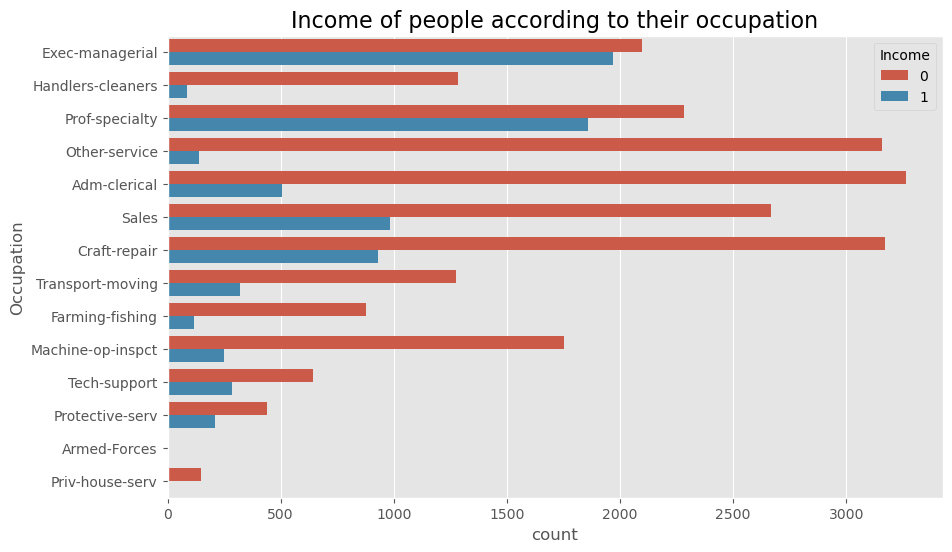

In [42]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their occupation", fontsize = 16)
sns.countplot(y = ds['Occupation'], hue = ds['Income'])
plt.show()

Majority of people whose income is greater than 50K are either executive managers or they belong to any professional speciality

In [43]:
occupation_enc = (ds.groupby('Occupation').size()) / len(ds)
print(occupation_enc)

ds['occupation_enc'] = ds['Occupation'].apply(lambda x : occupation_enc[x])
ds['occupation_enc'].head(3)

Occupation
Adm-clerical         0.122701
Armed-Forces         0.000293
Craft-repair         0.133444
Exec-managerial      0.132370
Farming-fishing      0.032360
Handlers-cleaners    0.044601
Machine-op-inspct    0.065176
Other-service        0.107270
Priv-house-serv      0.004851
Prof-specialty       0.134779
Protective-serv      0.021128
Sales                0.118827
Tech-support         0.030211
Transport-moving     0.051991
dtype: float64


0    0.132370
1    0.044601
2    0.044601
Name: occupation_enc, dtype: float64

In [44]:
ds.drop(['Occupation'], axis = 1, inplace = True)

**'Native_country':** We are checking for the salary on people in USA and outside USA, so , **we will convert all the values where country is not USA to 'non-usa'.** This way, we can encode the values by one-hot encoding without increasing the curse of dimensionality.

In [45]:
ds.Native_country.value_counts()

 United-States                 27503
 Mexico                          610
 ?                               556
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Haiti                            42
 Taiwan                           42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

In [46]:
ds['Native_country'][0]

' United-States'

In [47]:
ds['Native_country'].loc[ds['Native_country'] != ' United-States'] = 'non_usa'
ds.Native_country.value_counts()

 United-States    27503
non_usa            3214
Name: Native_country, dtype: int64

In [48]:
ds['Native_country'].loc[ds['Native_country'] == ' United-States'] = 'usa'

In [49]:
ds.Native_country.value_counts()

usa        27503
non_usa     3214
Name: Native_country, dtype: int64

In [50]:
plt.style.use('default')

In [51]:
plt.style.use('seaborn-pastel')

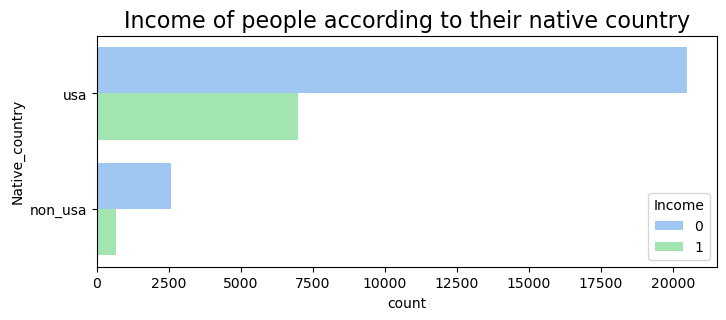

In [54]:
plt.figure(figsize = (8,3))
plt.title("Income of people according to their native country", fontsize = 16)
sns.countplot(y = ds['Native_country'], hue = ds['Income'])
plt.show()

**Majority of people with higher income belong to the USA**. We also have more number of people from USA then any other country combined in this dataset.

In [55]:
ds['Country_enc'] = ds['Native_country'].map({'usa' : 1, 'non_usa' : 0})
ds.head()

,Age,Fnlwgt,Education_num,Marital_status,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Workclass_enc,occupation_enc,Country_enc
0,50,83311,13,Married-civ-spouse,Husband,White,Male,0,0,13,usa,0,0.078041,0.132370,1
1,38,215646,9,Divorced,Not-in-family,White,Male,0,0,40,usa,0,0.697052,0.044601,1
2,53,234721,7,Married-civ-spouse,Husband,Black,Male,0,0,40,usa,0,0.697052,0.044601,1
3,28,338409,13,Married-civ-spouse,Wife,Black,Female,0,0,40,non_usa,0,0.697052,0.134779,0
4,37,284582,14,Married-civ-spouse,Wife,White,Female,0,0,40,usa,0,0.697052,0.132370,1


In [56]:
ds.drop(['Native_country'], axis = 1, inplace = True)

**'Sex':** Similarly, encoding the sex using one hot encoding.

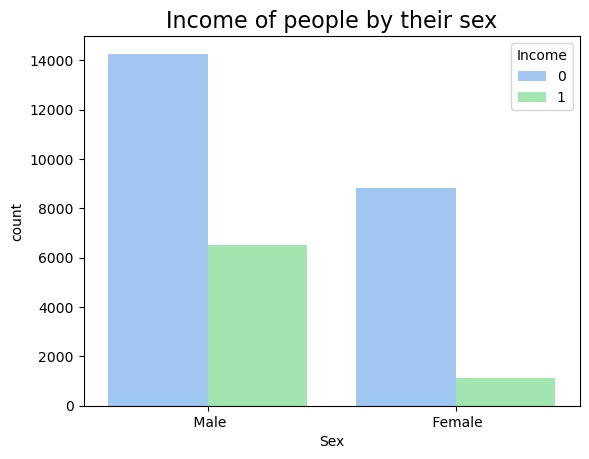

In [58]:
#plt.figure(figsize = (8,3))
plt.title("Income of people by their sex", fontsize = 16)
sns.countplot(x = ds['Sex'], hue = ds['Income'])
plt.show()

We can see that male have more salary than female. Also in the dataset, the number of men are more than women.

In [59]:
ds['Sex_enc'] = ds['Sex'].map({' Male' : 1, ' Female' : 0})

In [60]:
ds.drop(['Sex'], axis = 1, inplace = True)

**'Marital_status':** Looking at the unique values and their counts-

In [61]:
ds['Marital_status'].value_counts()

 Married-civ-spouse       14339
 Never-married             9911
 Divorced                  4258
 Separated                  959
 Widowed                    840
 Married-spouse-absent      389
 Married-AF-spouse           21
Name: Marital_status, dtype: int64

In [66]:
plt.style.use('default')

In [63]:
plt.style.use('seaborn-talk')

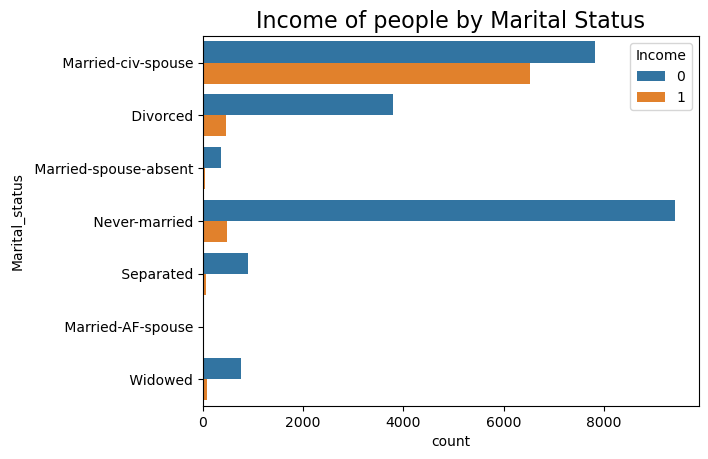

In [67]:
plt.title("Income of people by Marital Status", fontsize = 16)
sns.countplot(y = ds['Marital_status'], hue = ds['Income'])
plt.show()

**Married people have a higher income as compared to others.**

In [68]:
marital_status_enc = (ds.groupby('Marital_status').size()) / len(ds)
print(marital_status_enc)

ds['marital_status_enc'] = ds['Marital_status'].apply(lambda x : marital_status_enc[x])
ds['marital_status_enc'].head(3)

Marital_status
 Divorced                 0.138620
 Married-AF-spouse        0.000684
 Married-civ-spouse       0.466810
 Married-spouse-absent    0.012664
 Never-married            0.322655
 Separated                0.031220
 Widowed                  0.027346
dtype: float64


0    0.46681
1    0.13862
2    0.46681
Name: marital_status_enc, dtype: float64

In [69]:
ds.drop(['Marital_status'], axis = 1, inplace = True)

Similarly, **for 'Race' and 'Relationship'**

In [81]:
plt.style.use('bmh')

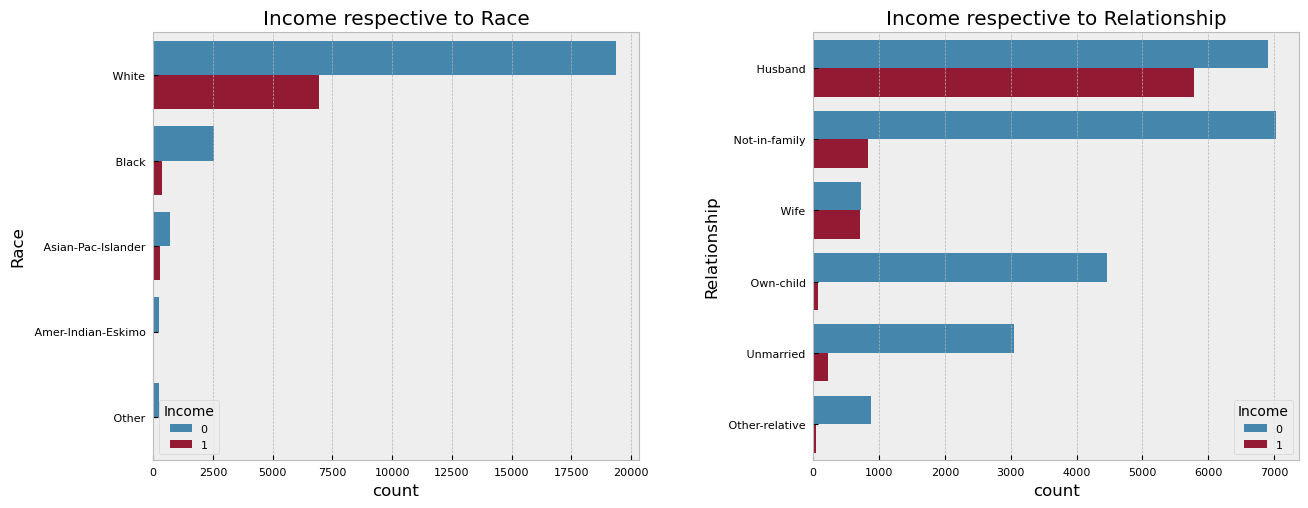

In [82]:
plt.figure(figsize = (14,6))

plt.subplot(1, 2, 1)
sns.countplot(y = ds['Race'], hue = ds['Income'])
plt.title("Income respective to Race")

plt.subplot(1, 2, 2)
sns.countplot(y = ds['Relationship'], hue = ds['Income'])
plt.title("Income respective to Relationship")

plt.tight_layout(pad = 4)
plt.show()

**White people have a higher salary as compared to other races**. Similarly, **husband in the family have a higher salary as compared to other relationship in the family.**

In [83]:
race_enc = (ds.groupby('Race').size()) / len(ds)
print(race_enc)
ds['race_enc'] = ds['Race'].apply(lambda x : race_enc[x])

relationship_enc = (ds.groupby('Relationship').size()) / len(ds)
print(relationship_enc)
ds['relationship_enc'] = ds['Relationship'].apply(lambda x : relationship_enc[x])

Race
 Amer-Indian-Eskimo    0.009311
 Asian-Pac-Islander    0.031709
 Black                 0.094703
 Other                 0.008074
 White                 0.856203
dtype: float64
Relationship
 Husband           0.413582
 Not-in-family     0.256015
 Other-relative    0.029886
 Own-child         0.147313
 Unmarried         0.106488
 Wife              0.046717
dtype: float64


In [84]:
ds.drop(['Race', 'Relationship'], axis = 1, inplace = True)
ds.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_enc,occupation_enc,Country_enc,Sex_enc,marital_status_enc,race_enc,relationship_enc
0,50,83311,13,0,0,13,0,0.078041,0.132370,1,1,0.46681,0.856203,0.413582
1,38,215646,9,0,0,40,0,0.697052,0.044601,1,1,0.13862,0.856203,0.256015
2,53,234721,7,0,0,40,0,0.697052,0.044601,1,1,0.46681,0.094703,0.413582
3,28,338409,13,0,0,40,0,0.697052,0.134779,0,0,0.46681,0.094703,0.046717
4,37,284582,14,0,0,40,0,0.697052,0.132370,1,0,0.46681,0.856203,0.046717


In [85]:
new_ds = ds.drop(['Income'], axis = 1)
new_ds['Income'] = ds['Income']
new_ds

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_enc,occupation_enc,Country_enc,Sex_enc,marital_status_enc,race_enc,relationship_enc,Income
0,50,83311,13,0,0,13,0.078041,0.132370,1,1,0.466810,0.856203,0.413582,0
1,38,215646,9,0,0,40,0.697052,0.044601,1,1,0.138620,0.856203,0.256015,0
2,53,234721,7,0,0,40,0.697052,0.044601,1,1,0.466810,0.094703,0.413582,0
3,28,338409,13,0,0,40,0.697052,0.134779,0,0,0.466810,0.094703,0.046717,0
4,37,284582,14,0,0,40,0.697052,0.132370,1,0,0.466810,0.856203,0.046717,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,0.697052,0.030211,1,0,0.466810,0.856203,0.046717,0
32556,40,154374,9,0,0,40,0.697052,0.065176,1,1,0.466810,0.856203,0.413582,1
32557,58,151910,9,0,0,40,0.697052,0.122701,1,0,0.027346,0.856203,0.106488,0
32558,22,201490,9,0,0,20,0.697052,0.122701,1,1,0.322655,0.856203,0.147313,0


## Outliers:
We check if any outliers are present in the continous attributes of the dataset. We check it both by visualisations and the zscore for the continous columns.

In [88]:
plt.style.use('default')

In [89]:
plt.style.use('ggplot')

BoxPlots of the features:


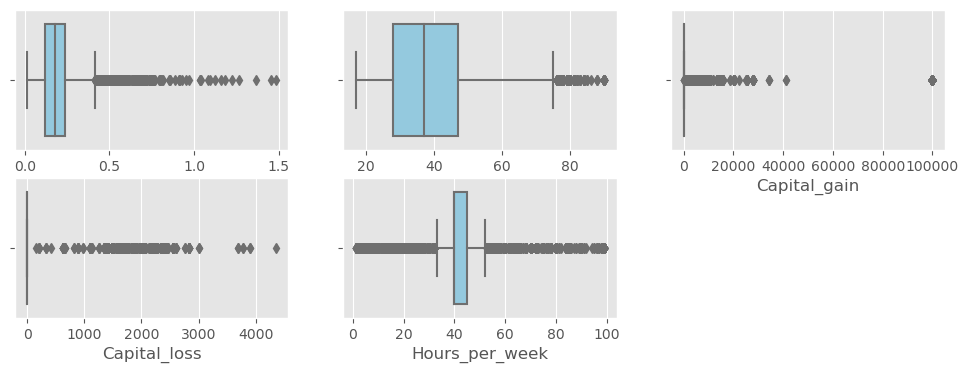

In [92]:
clist = ['Fnlwgt','Age','Capital_gain','Capital_loss','Hours_per_week']
plt.figure(figsize = (12,4))
for i in range(0, len(clist)):
    plt.subplot(2,3, i+1)
    sns.boxplot(ds[clist[i]], color = 'skyblue')
print("BoxPlots of the features:")
plt.show()

**Outliers are present in the continous columns of the feature**. We will check the z-score of the features and and clip them from the data.

In [93]:
from scipy.stats import zscore

In [94]:
new_ds.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_enc,occupation_enc,Country_enc,Sex_enc,marital_status_enc,race_enc,relationship_enc,Income
0,50,83311,13,0,0,13,0.078041,0.132370,1,1,0.46681,0.856203,0.413582,0
1,38,215646,9,0,0,40,0.697052,0.044601,1,1,0.13862,0.856203,0.256015,0
2,53,234721,7,0,0,40,0.697052,0.044601,1,1,0.46681,0.094703,0.413582,0
3,28,338409,13,0,0,40,0.697052,0.134779,0,0,0.46681,0.094703,0.046717,0
4,37,284582,14,0,0,40,0.697052,0.132370,1,0,0.46681,0.856203,0.046717,0


In [95]:
zabs = np.abs(zscore(new_ds.loc[:,'Fnlwgt':'Hours_per_week']))

In [96]:
np.shape(np.where(zabs >= 3))

(2, 2566)

In [97]:
new_ds = new_ds[(zabs < 3).all(axis = 1)]
new_ds

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_enc,occupation_enc,Country_enc,Sex_enc,marital_status_enc,race_enc,relationship_enc,Income
0,50,83311,13,0,0,13,0.078041,0.132370,1,1,0.466810,0.856203,0.413582,0
1,38,215646,9,0,0,40,0.697052,0.044601,1,1,0.138620,0.856203,0.256015,0
2,53,234721,7,0,0,40,0.697052,0.044601,1,1,0.466810,0.094703,0.413582,0
3,28,338409,13,0,0,40,0.697052,0.134779,0,0,0.466810,0.094703,0.046717,0
4,37,284582,14,0,0,40,0.697052,0.132370,1,0,0.466810,0.856203,0.046717,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,0.697052,0.030211,1,0,0.466810,0.856203,0.046717,0
32556,40,154374,9,0,0,40,0.697052,0.065176,1,1,0.466810,0.856203,0.413582,1
32557,58,151910,9,0,0,40,0.697052,0.122701,1,0,0.027346,0.856203,0.106488,0
32558,22,201490,9,0,0,20,0.697052,0.122701,1,1,0.322655,0.856203,0.147313,0


After removing the outliers, we have 28213 observations left.
## Correlation:
Checking the correlation between the features and target variable to see which of them columns are more related to target.

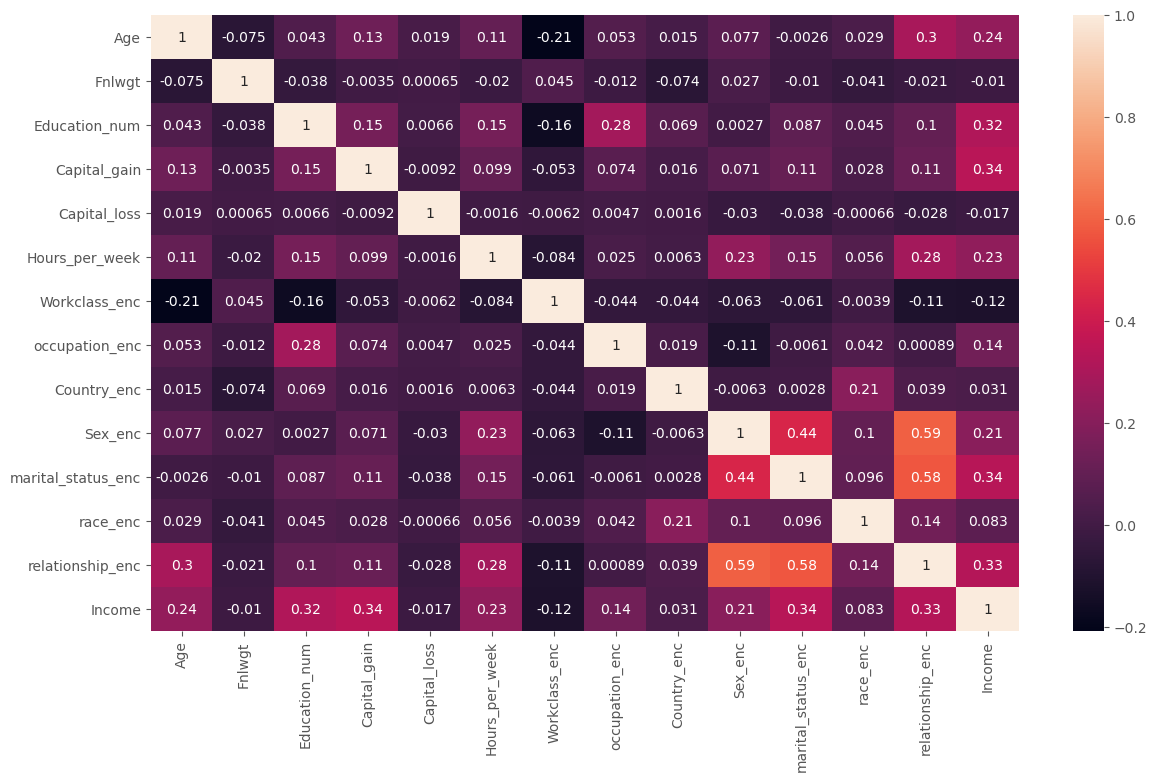

In [98]:
plt.figure(figsize = (14, 8))
sns.heatmap(new_ds.corr(), annot = True)
plt.show()

'Capital_gain', 'Education_num', 'Marital_status_enc', 'Relationship_enc' are most correlated to the Income of the observations.
## Scaling:
As we see that the values of attributes in the dataset vary largely, so it is important to scale the data. Using the Min-Max scaler in order to bring normalisation in the data.

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
scale = MinMaxScaler()
new_ds.loc[:,'Age':'Hours_per_week'] = scale.fit_transform(new_ds.loc[:,'Age':'Hours_per_week'])
new_ds

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_enc,occupation_enc,Country_enc,Sex_enc,marital_status_enc,race_enc,relationship_enc,Income
0,0.452055,0.141285,0.769231,0.00000,0.0,0.112676,0.078041,0.132370,1,1,0.466810,0.856203,0.413582,0
1,0.287671,0.410143,0.461538,0.00000,0.0,0.492958,0.697052,0.044601,1,1,0.138620,0.856203,0.256015,0
2,0.493151,0.448897,0.307692,0.00000,0.0,0.492958,0.697052,0.044601,1,1,0.466810,0.094703,0.413582,0
3,0.150685,0.659555,0.769231,0.00000,0.0,0.492958,0.697052,0.134779,0,0,0.466810,0.094703,0.046717,0
4,0.273973,0.550197,0.846154,0.00000,0.0,0.492958,0.697052,0.132370,1,0,0.466810,0.856203,0.046717,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.136986,0.494774,0.692308,0.00000,0.0,0.464789,0.697052,0.030211,1,0,0.466810,0.856203,0.046717,0
32556,0.315068,0.285660,0.461538,0.00000,0.0,0.492958,0.697052,0.065176,1,1,0.466810,0.856203,0.413582,1
32557,0.561644,0.280654,0.461538,0.00000,0.0,0.492958,0.697052,0.122701,1,0,0.027346,0.856203,0.106488,0
32558,0.068493,0.381383,0.461538,0.00000,0.0,0.211268,0.697052,0.122701,1,1,0.322655,0.856203,0.147313,0


AS we can see from the above table that the data is now more normalised and can be used by the models for learning.
![](https://kiarofoods.com/wp-content/uploads/2019/10/line_break.png)
# Data Imbalance:
If the data is imbalanced, it can cause the overfitting and bias in the odel prediction. So it is important to check and cure the data imbalance if present. We check the target variable to see if it is balanced or not.

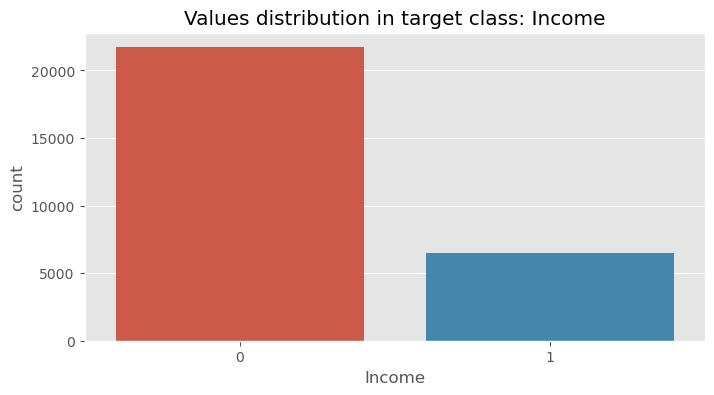

In [101]:
plt.figure(figsize = (8, 4))
plt.title("Values distribution in target class: Income")
sns.countplot(data = new_ds, x = 'Income')
plt.show()

As we can see that data is imbalanced. In order **to remove the data imbalance, we use the SMOTETomek class to create synthetic values using KNN algorithm.**

In [102]:
from imblearn.combine import SMOTETomek
x = new_ds.loc[:,"Age":"relationship_enc"]
y = new_ds.loc[:,"Income"]
smk = SMOTETomek()
x_new, y_new = smk.fit_resample(x, y)
print(x_new.shape, y_new.shape)

(42268, 13) (42268,)


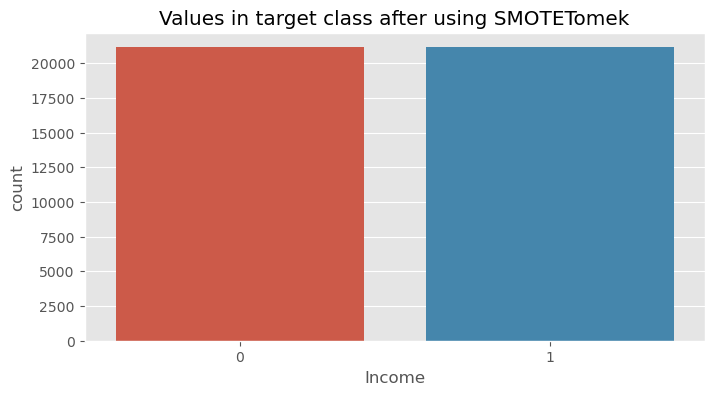

In [103]:
plt.figure(figsize = (8, 4))
plt.title("Values in target class after using SMOTETomek")
sns.countplot(x = y_new)
plt.show()

As we can see that we now have a balanced dataset, so we can model ahead with the model building part.
![](https://kiarofoods.com/wp-content/uploads/2019/10/line_break.png)
# Model Building:
Starting with the spliting of the training and testing data. For that, we check to see what is the best random state.

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

max_accuracy = 0
best_rs = 0
for i in range(1, 150):
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy: # after each iteration, acc is replace by the best possible accuracy
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy*100}")

Best Random State is 36, 81.41313776516049


Best posibble random state is 36, so using it to split the data

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.30, random_state = 36)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(29587, 13) (12681, 13) (29587,) (12681,)


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [108]:
# For Logistic Regression
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model is", accuracy_score(y_test, pred_lg)*100)

# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model is", accuracy_score(y_test, pred_dtc)*100)

# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model is", accuracy_score(y_test, pred_knc)*100)

# For Support Vector Classifier
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print("Accuracy Score of Support Vector Classifier model is", accuracy_score(y_test, pred_svc)*100)

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model is", accuracy_score(y_test, pred_rfc)*100)

# For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model is", accuracy_score(y_test, pred_nb)*100)

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model is", accuracy_score(y_test, pred_ada)*100)

Accuracy Score of Logistic Regression model is 81.41313776516049
Accuracy Score of Decision Tree Classifier model is 86.53103067581421
Accuracy Score of K-Nearest Neighbour Classifier model is 86.0499960570933
Accuracy Score of Support Vector Classifier model is 82.65121047236022
Accuracy Score of Random Forest model is 91.01805851273559
Accuracy Score of MultinomialNB model is 65.97271508556108
Accuracy Score of ADA Boost model is 85.74244933364876


Best accuracy score is given by Random Forest Classifier model. In order to avoid the bias and overfitting or underfitting, we cross validate the models and check the mean accuracy score of them.

In [109]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg, x_new, y_new, cv = 10) # cross validating the model
print(lg_scores) # accuracy scores of each cross validation cycle
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")

dtc_scores = cross_val_score(dtc, x_new, y_new, cv = 10)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

knc_scores = cross_val_score(knc, x_new, y_new, cv = 10)
print(knc_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knc_scores.mean()*100}\n")

svc_scores = cross_val_score(svc, x_new, y_new, cv = 10)
print(svc_scores)
print(f"Mean of accuracy scores is for SVC Classifier is {svc_scores.mean()*100}\n")

rfc_scores = cross_val_score(rfc, x_new, y_new, cv = 10)
print(rfc_scores)
print(f"Mean of accuracy scores is for Random Forest Classifier is {rfc_scores.mean()*100}\n")

nb_scores = cross_val_score(nb, x_new, y_new, cv = 10)
print(nb_scores)
print(f"Mean of accuracy scores is for MultinomialNB is {nb_scores.mean()*100}\n")

ada_scores = cross_val_score(ada, x_new, y_new, cv = 10)
print(ada_scores)
print(f"Mean of accuracy scores is for ADA Boost Classifier is {ada_scores.mean()*100}\n")

[0.79938491 0.80600899 0.8123965  0.80506269 0.79843861 0.80742844
 0.81689141 0.81452567 0.81140558 0.80667298]
Mean of accuracy scores is for Logistic Regression is 80.78215774440807

[0.76933996 0.76910338 0.79323397 0.90324107 0.91294062 0.91270405
 0.90749941 0.91317719 0.91268339 0.90724089]
Mean of accuracy scores is for Decision Tree Classifier is 87.01163928147216

[0.85639934 0.85356044 0.8604211  0.87390584 0.86751833 0.87319612
 0.87863733 0.87579844 0.87292948 0.87837198]
Mean of accuracy scores is for KNN Classifier is 86.90738420030071

[0.82422522 0.82942986 0.82659096 0.82446179 0.81902058 0.82966643
 0.83534422 0.83250532 0.82820634 0.83104591]
Mean of accuracy scores is for SVC Classifier is 82.8049662934658

[0.82493494 0.8317956  0.84599006 0.93849066 0.94724391 0.94061982
 0.95079252 0.94937308 0.94249882 0.94320871]
Mean of accuracy scores is for Random Forest Classifier is 91.14948121013684

[0.64182635 0.65010646 0.66122546 0.64963331 0.64442867 0.64774071
 0.6

In [110]:
# Checking for difference between accuracy and mean accuracies.
lis3 = ['Logistic Regression','Decision Tree Classifier','KNeighbors Classifier','SVC', 'Random Forest Classifier', 
        'MultinomialNB', 'ADA Boost Classifier']

lis1 = [accuracy_score(y_test, pred_lg)*100, accuracy_score(y_test, pred_dtc)*100, accuracy_score(y_test, pred_knc)*100, 
        accuracy_score(y_test, pred_svc)*100, accuracy_score(y_test, pred_rfc)*100, accuracy_score(y_test, pred_nb)*100,
        accuracy_score(y_test, pred_ada)*100]

lis2 = [lg_scores.mean()*100, dtc_scores.mean()*100, knc_scores.mean()*100, svc_scores.mean()*100, rfc_scores.mean()*100, 
        nb_scores.mean()*100, ada_scores.mean()*100]

for i in range(0, 7):
    dif = (lis1[i]) - (lis2[i])
    print(lis3[i], dif)

Logistic Regression 0.6309800207524177
Decision Tree Classifier -0.48060860565794883
KNeighbors Classifier -0.857388143207416
SVC -0.15375582110557673
Random Forest Classifier -0.13142269740124846
MultinomialNB 0.8927293136136569
ADA Boost Classifier 0.4012285447934829


**Random forest classifier is the best model with highest cross validation mean score and accuracy score**. We will use it for the model building.
## Hyperparameter Tuning:
Tuning the parameters of the Random Forest in order to obtain the best possible parameters for model building.

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
rfc = RandomForestClassifier()
param = dict()
param['criterion'] = ['gini', 'entropy']
param['n_estimators'] = [1, 2, 4, 8, 10, 16, 32, 64, 100, 200]
param['min_samples_split'] = [1,2,5,8,10,15,20,25,50,55,60,80,100]


gs = GridSearchCV(estimator = rfc, param_grid = param, scoring='f1', cv = 5, n_jobs = 3)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9050427672156447
{'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 200}


After the hyperparameter tuning, **the best parameters for Random Forest Classifier are 'crietrion' = 'entropy', 'min_samples_split' = 2, 'n_estimators' = 200**

In [113]:
rfc = RandomForestClassifier(criterion = 'entropy', min_samples_split = 2, n_estimators = 200)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
pred_rfc = rfc.predict(x_test)

1.0


![](https://kiarofoods.com/wp-content/uploads/2019/10/line_break.png)
# Model Evaluation:
We have build the model after the cross validation and hyper parameter tuning. It is now time to evaluate the model using the classification report, confusion matrix and ROC curve.

In [114]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report

Accuracy Score of RFC model is 91.2073180348553
Confusion matrix for RFC Model is
[[5780  596]
 [ 519 5786]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      6376
           1       0.91      0.92      0.91      6305

    accuracy                           0.91     12681
   macro avg       0.91      0.91      0.91     12681
weighted avg       0.91      0.91      0.91     12681



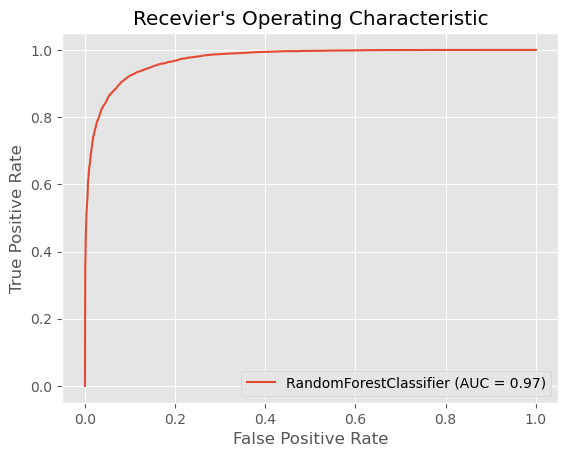

In [115]:
print("Accuracy Score of RFC model is", accuracy_score(y_test, pred_rfc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_rfc))
print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_rfc))

plot_roc_curve(rfc, x_test, y_test) # arg. are model name, feature testing data, label testing data.
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

After the model evaluation , we get the **precision and recall for both the target variable as 0.92 and 0.91**. The **f1- score of the model is 0.91**. The ROC curve gave us **the AUC score which is 0.97**. Model evaluation gives the results that ***the prediction is very accurate.***
![](https://miro.medium.com/max/2400/1*IH10jlQEJ7GW1_oq8s7WPw.png)
# Serialisation:
Now we save the Random Forest Classifier Model as an object using joblib.

In [116]:
import joblib
joblib.dump(rfc, 'Census Income Prediction.obj') # saving the model as an object

['Census Income Prediction.obj']